In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/"MyDrive/Colab Notebooks"

/content/drive/MyDrive/Colab Notebooks


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import glob
import cv2
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [ ]:
def get_pixel(img, center, x, y):
      
    new_value = 0
      
    try:
        # If local neighbourhood pixel 
        # value is greater than or equal
        # to center pixel values then 
        # set it to 1
        if img[x][y] >= center:
            new_value = 1
              
    except:
        # Exception is required when 
        # neighbourhood value of a center
        # pixel value is null i.e. values
        # present at boundaries.
        pass
      
    return new_value

In [ ]:
# Function for calculating LBP
def lbp_calculated_pixel(img, x, y):
   
    center = img[x][y]
   
    val_ar = []
      
    # top_left
    val_ar.append(get_pixel(img, center, x-1, y-1))
      
    # top
    val_ar.append(get_pixel(img, center, x-1, y))
      
    # top_right
    val_ar.append(get_pixel(img, center, x-1, y + 1))
      
    # right
    val_ar.append(get_pixel(img, center, x, y + 1))
      
    # bottom_right
    val_ar.append(get_pixel(img, center, x + 1, y + 1))
      
    # bottom
    val_ar.append(get_pixel(img, center, x + 1, y))
      
    # bottom_left
    val_ar.append(get_pixel(img, center, x + 1, y-1))
      
    # left
    val_ar.append(get_pixel(img, center, x, y-1))
       
    # Now, we need to convert binary
    # values to decimal
    power_val = [1, 2, 4, 8, 16, 32, 64, 128]
   
    val = 0
      
    for i in range(len(val_ar)):
        val += val_ar[i] * power_val[i]
          
    return val

In [ ]:
X_train = list()

y_train = list()


In [ ]:
X_test = list()
y_test = list()

In [ ]:
# 0 = crazing 
# 1 = inclusion
# 2 = patches
# 3 = pitted_surface
# 4 = rolled in scale
# 5 = scratches

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/images/train/crazing/*.jpg"
for file in glob.glob(path):     
#   img=cv2.imread(file)
#   img2=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#   X_train.append(img2)      #append all the pixel vector in X_train
  y_train.append(0)         #append all the class in y_train

  img_bgr = cv2.imread(file, 1)
   
  height, width, _ = img_bgr.shape
    
  # We need to convert RGB image 
  # into gray one because gray 
  # image has one channel only.
  img_gray = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2GRAY)
  img = img_gray.reshape(-1)  
  # Create a numpy array as 
  # the same height and width 
  # of RGB image
  img_lbp = np.zeros((height, width),np.uint8)
 

    
  for i in range(0, height):
      for j in range(0, width):
          img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)
  X_train.append(img_lbp)

print(len(X_train))


168


In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/images/train/inclusion/*.jpg"
for file in glob.glob(path):     
#   img=cv2.imread(file)
#   img2=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#   X_train.append(img2)      #append all the pixel vector in X_train
  y_train.append(1)         #append all the class in y_train
  img_bgr = cv2.imread(file, 1)
   
  height, width, _ = img_bgr.shape
    
  # We need to convert RGB image 
  # into gray one because gray 
  # image has one channel only.
  img_gray = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2GRAY)
    
  # Create a numpy array as 
  # the same height and width 
  # of RGB image
  img_lbp = np.zeros((height, width),np.uint8)
    
  for i in range(0, height):
      for j in range(0, width):
          img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)
  X_train.append(img_lbp)



print(len(X_train))

336


In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/images/train/patches/*.jpg"
for file in glob.glob(path):     
#   img=cv2.imread(file)
#   img2=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#   X_train.append(img2)      #append all the pixel vector in X_train
  y_train.append(2)         #append all the class in y_train
  img_bgr = cv2.imread(file, 1)
   
  height, width, _ = img_bgr.shape
    
  # We need to convert RGB image 
  # into gray one because gray 
  # image has one channel only.
  img_gray = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2GRAY)
    
  # Create a numpy array as 
  # the same height and width 
  # of RGB image
  img_lbp = np.zeros((height, width),np.uint8)
    
  for i in range(0, height):
      for j in range(0, width):
          img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)
  X_train.append(img_lbp)


print(len(X_train))

504


In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/images/train/pitted_surface/*.jpg"
for file in glob.glob(path):     
#   img=cv2.imread(file)
#   img2=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#   X_train.append(img2)      #append all the pixel vector in X_train
  y_train.append(3)         #append all the class in y_train
  img_bgr = cv2.imread(file, 1)
   
  height, width, _ = img_bgr.shape
    
  # We need to convert RGB image 
  # into gray one because gray 
  # image has one channel only.
  img_gray = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2GRAY)
    
  # Create a numpy array as 
  # the same height and width 
  # of RGB image
  img_lbp = np.zeros((height, width),np.uint8)
    
  for i in range(0, height):
      for j in range(0, width):
          img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)
  X_train.append(img_lbp)



print(len(X_train))

672


In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/images/train/rolled-in_scale/*.jpg"
for file in glob.glob(path):     
#   img=cv2.imread(file)
#   img2=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#   X_train.append(img2)      #append all the pixel vector in X_train
  y_train.append(4)         #append all the class in y_train
  img_bgr = cv2.imread(file, 1)
   
  height, width, _ = img_bgr.shape
    
  # We need to convert RGB image 
  # into gray one because gray 
  # image has one channel only.
  img_gray = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2GRAY)
    
  # Create a numpy array as 
  # the same height and width 
  # of RGB image
  img_lbp = np.zeros((height, width),np.uint8)
    
  for i in range(0, height):
      for j in range(0, width):
          img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)
  X_train.append(img_lbp)



print(len(X_train))

840


In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/images/train/scratches/*.jpg"
for file in glob.glob(path):     
#   img=cv2.imread(file)
#   img2=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#   X_train.append(img2)      #append all the pixel vector in X_train
  y_train.append(5)         #append all the class in y_train
  img_bgr = cv2.imread(file, 1)
   
  height, width, _ = img_bgr.shape
    
  # We need to convert RGB image 
  # into gray one because gray 
  # image has one channel only.
  img_gray = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2GRAY)
    
  # Create a numpy array as 
  # the same height and width 
  # of RGB image
  img_lbp = np.zeros((height, width),np.uint8)
    
  for i in range(0, height):
      for j in range(0, width):
          img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)
  X_train.append(img_lbp)



print(len(X_train))

1008


In [ ]:
# Testing

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/images/test/crazing_test/*.jpg"
for file in glob.glob(path):     
#   img=cv2.imread(file)
#   img2=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#   X_test.append(img2)      #append all the pixel vector in X_test
  y_test.append(0)         #append all the class in y_test
  img_bgr = cv2.imread(file, 1)
   
  height, width, _ = img_bgr.shape
    
  # We need to convert RGB image 
  # into gray one because gray 
  # image has one channel only.
  img_gray = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2GRAY)
    
  # Create a numpy array as 
  # the same height and width 
  # of RGB image
  img_lbp = np.zeros((height, width),np.uint8)
    
  for i in range(0, height):
      for j in range(0, width):
          img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)
  X_test.append(img_lbp)


print(len(X_test))

72


In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/images/test/inclusion _test/*.jpg"
for file in glob.glob(path):     
#   img=cv2.imread(file)
#   img2=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#   X_test.append(img2)      #append all the pixel vector in X_test
  y_test.append(1)         #append all the class in y_test
  img_bgr = cv2.imread(file, 1)
   
  height, width, _ = img_bgr.shape
    
  # We need to convert RGB image 
  # into gray one because gray 
  # image has one channel only.
  img_gray = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2GRAY)
    
  # Create a numpy array as 
  # the same height and width 
  # of RGB image
  img_lbp = np.zeros((height, width),np.uint8)
    
  for i in range(0, height):
      for j in range(0, width):
          img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)
  X_test.append(img_lbp)

print(len(X_test))

144


In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/images/test/patches _test/*.jpg"
for file in glob.glob(path):     
#   img=cv2.imread(file)
#   img2=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#   X_test.append(img2)      #append all the pixel vector in X_test
  y_test.append(2)         #append all the class in y_test
  img_bgr = cv2.imread(file, 1)
   
  height, width, _ = img_bgr.shape
    
  # We need to convert RGB image 
  # into gray one because gray 
  # image has one channel only.
  img_gray = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2GRAY)
    
  # Create a numpy array as 
  # the same height and width 
  # of RGB image
  img_lbp = np.zeros((height, width),np.uint8)
    
  for i in range(0, height):
      for j in range(0, width):
          img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)
  X_test.append(img_lbp)

print(len(X_test))

216


In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/images/test/pitted_surface_test/*.jpg"
for file in glob.glob(path):     
#   img=cv2.imread(file)
#   img2=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#   X_test.append(img2)      #append all the pixel vector in X_test
  y_test.append(3)         #append all the class in y_test
  img_bgr = cv2.imread(file, 1)
   
  height, width, _ = img_bgr.shape
    
  # We need to convert RGB image 
  # into gray one because gray 
  # image has one channel only.
  img_gray = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2GRAY)
    
  # Create a numpy array as 
  # the same height and width 
  # of RGB image
  img_lbp = np.zeros((height, width),np.uint8)
    
  for i in range(0, height):
      for j in range(0, width):
          img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)
  X_test.append(img_lbp)

print(len(X_test))

288


In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/images/test/rolled-in_scale _test/*.jpg"
for file in glob.glob(path):     
#   img=cv2.imread(file)
#   img2=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#   X_test.append(img2)      #append all the pixel vector in X_test
  y_test.append(4)         #append all the class in y_test
  img_bgr = cv2.imread(file, 1)
   
  height, width, _ = img_bgr.shape
    
  # We need to convert RGB image 
  # into gray one because gray 
  # image has one channel only.
  img_gray = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2GRAY)
    
  # Create a numpy array as 
  # the same height and width 
  # of RGB image
  img_lbp = np.zeros((height, width),np.uint8)
    
  for i in range(0, height):
      for j in range(0, width):
          img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)
  X_test.append(img_lbp)

print(len(X_test))

360


In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/images/test/scratches _test/*.jpg"
for file in glob.glob(path):     
#   img=cv2.imread(file)
#   img2=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#   X_test.append(img2)      #append all the pixel vector in X_test
  y_test.append(5)         #append all the class in y_test
  img_bgr = cv2.imread(file, 1)
   
  height, width, _ = img_bgr.shape
    
  # We need to convert RGB image 
  # into gray one because gray 
  # image has one channel only.
  img_gray = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2GRAY)
    
  # Create a numpy array as 
  # the same height and width 
  # of RGB image
  img_lbp = np.zeros((height, width),np.uint8)
    
  for i in range(0, height):
      for j in range(0, width):
          img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)
  X_test.append(img_lbp)

print(len(X_test))

432


In [ ]:
print(X_train)

[array([[ 52, 251, 121, ...,  33, 232,  64],
       [ 16, 184, 124, ...,  82, 165, 227],
       [ 62,  16, 248, ..., 223,   0, 129],
       ...,
       [126, 123,  69, ..., 225, 243, 225],
       [ 56,  96, 210, ..., 193, 249,  32],
       [  8,   0, 139, ..., 131, 141,   0]], dtype=uint8), array([[ 62, 127,  62, ..., 149, 167, 195],
       [ 48, 252,   0, ..., 255,   0, 195],
       [ 56, 116, 226, ..., 252,  34, 227],
       ...,
       [ 62,   8,   4, ..., 239,  15,   2],
       [ 44,   6, 135, ..., 247, 255,  99],
       [  4, 143,   3, ..., 139,   0, 128]], dtype=uint8), array([[255,  15,   1, ..., 240, 224, 226],
       [229, 254,   7, ..., 128, 128, 225],
       [193, 141,  22, ...,   7, 163, 225],
       ...,
       [255,  56, 120, ...,   6, 135, 131],
       [253, 120, 124, ..., 199, 159,  35],
       [  8,   0, 128, ..., 135, 143,   0]], dtype=uint8), array([[ 62,  51, 225, ..., 255, 103, 227],
       [ 28,   8,   0, ..., 208, 240, 225],
       [ 62,  22, 183, ..., 251, 120, 

In [ ]:
X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)

In [ ]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1008, 200, 200) (1008,)
Test set: (432, 200, 200) (432,)


In [ ]:
nsamples, nx, ny = X_train.shape
X_train = X_train.reshape((nsamples,nx*ny))

In [ ]:
print(X_train.shape)

(1008, 40000)


In [ ]:
nsamples, nx, ny = X_test.shape
X_test = X_test.reshape((nsamples,nx*ny))

In [ ]:
print(X_test.shape)

(432, 40000)


In [ ]:
knn=KNeighborsClassifier(n_neighbors=7) 

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
y_pred_knn=knn.predict(X_test)
y_pred_knn

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 3, 3, 1, 5,
       1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 3, 3, 3, 1, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 1, 3, 5, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 1, 3,
       3, 3, 3, 1, 3, 1, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 5, 3, 2, 3, 1, 3, 1, 1, 3, 1,
       3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 1,
       5, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
accuracy_score(y_test,y_pred_knn)
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        72
           1       0.36      0.22      0.27        72
           2       0.00      0.00      0.00        72
           3       0.16      0.82      0.26        72
           4       0.00      0.00      0.00        72
           5       0.56      0.07      0.12        72

    accuracy                           0.19       432
   macro avg       0.18      0.19      0.11       432
weighted avg       0.18      0.19      0.11       432



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
confusion_matrix(y_pred_knn,y_test)

array([[ 0,  0,  0,  0,  0,  0],
       [ 0, 16,  0, 10,  0, 19],
       [ 0,  0,  0,  1,  0,  0],
       [72, 54, 72, 59, 72, 48],
       [ 0,  0,  0,  0,  0,  0],
       [ 0,  2,  0,  2,  0,  5]])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

In [ ]:
train_accuracy = list()
test_accuracy = list()
no_of_estimators = list()

In [ ]:
for i in range(10,100,5) :
    #Create a Gaussian Classifier
    clf=RandomForestClassifier(n_estimators=i)

    #Train the model using the training sets y_pred=clf.predict(X_test)
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_train)
    #print("Train Accuracy:",metrics.accuracy_score(output_class, y_pred))
    train_accuracy.append(metrics.accuracy_score(y_train, y_pred))

    y_pred_test = clf.predict(X_test)
    #print("Test Accuracy:",metrics.accuracy_score(output_predict_class, y_pred_test))
    test_accuracy.append(metrics.accuracy_score(y_test, y_pred_test))

    no_of_estimators.append(i)

In [ ]:
print(train_accuracy)
print(test_accuracy)
print(no_of_estimators)

[0.9872146118721461, 0.9990867579908675, 0.9990867579908675, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.2513812154696133, 0.24033149171270718, 0.2596685082872928, 0.24585635359116023, 0.2845303867403315, 0.23480662983425415, 0.26243093922651933, 0.2541436464088398, 0.2845303867403315, 0.27624309392265195, 0.24033149171270718, 0.2596685082872928, 0.24033149171270718, 0.2596685082872928, 0.2983425414364641, 0.26243093922651933, 0.2955801104972376, 0.2845303867403315]
[10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]


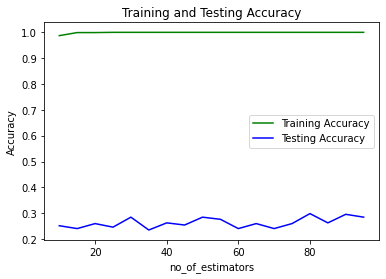

In [ ]:
plt.plot(no_of_estimators, train_accuracy, 'g', label='Training Accuracy')
plt.plot(no_of_estimators, test_accuracy, 'b', label='Testing Accuracy')
plt.title('Training and Testing Accuracy')
plt.xlabel('no_of_estimators')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
max(test_accuracy)

0.2983425414364641

In [ ]:
clf=RandomForestClassifier(n_estimators=70)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_train)
y_pred_test = clf.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test,y_pred_test))

0.281767955801105
[[17  4  7 16 10  6]
 [ 3 24  5  5  6 17]
 [16  6 15  9 11  3]
 [ 9  5 13 18  9  6]
 [23  0 16  0 19  2]
 [ 4 23  6  9 11  9]]
              precision    recall  f1-score   support

           0       0.24      0.28      0.26        60
           1       0.39      0.40      0.39        60
           2       0.24      0.25      0.25        60
           3       0.32      0.30      0.31        60
           4       0.29      0.32      0.30        60
           5       0.21      0.15      0.17        62

    accuracy                           0.28       362
   macro avg       0.28      0.28      0.28       362
weighted avg       0.28      0.28      0.28       362



In [ ]:
# every class has almost similar precision, recall, f1 score t=that is low